# First trial and errors in developing the code

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid as cumtrapz

In [102]:
params = {
   'axes.labelsize': 15,
   'font.size': 15,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

If you have an equation with the form:

$\dot{y} + p(y)y = f(t)$

In [103]:
eta = 2.5
m_o_cc = 0.015
r = 0.4
tau_star = 1 #Gyr
tau_dep = 0.323 #Gyr

def tau_dep_custom(tau_star, eta, r):
    return tau_star/(1 + eta - r)

def mu_t(p_t, t_start, t_end, n_bins = 100):
    grid = np.linspace(t_start, t_end, n_bins)
    integral = cumtrapz(p_t, grid, initial=0)
    mu_t = np.exp(integral)
    return mu_t

def y_t(mu, f, t_start, t_end, n_bins = 100, initial_y = 0):
    grid = np.linspace(t_start, t_end, n_bins)
    function_to_integrate = mu * f
    integral = cumtrapz(function_to_integrate, grid, initial=0)
    y_t = 1/mu * integral + initial_y
    return y_t

In [ ]:
def solve_for_M_o(t_array, M_g_array, tau_dep, o_yield, tau_star):
    """
    Solve for the oxygen mass M_O, given gas mass M_g(t) as a function of time.

    Parameters
    ----------
    t_array : array_like
        1D array of time values.
    M_g_array : array_like
        1D array of gas mass values corresponding to `t_array`.
    tau_dep : float
        Gas depletion timescale.
    o_yield : float
        IMF-integrated CCSN oxygen yield
    tau_star : float
        Star formation efficiency (SFE) timescale

    Returns
    -------
    t_array : ndarray
        The same time grid as input.
    M_O_array : ndarray
        Oxygen mass as a function of time, evaluated on `t_array`.
    
    """

    p_t = 1/tau_dep * np.ones(len(t_array))
    f_t = o_yield / tau_star * M_g_array
    integral_p = cumtrapz(p_t, t_array, initial=0)
    mu_t = np.exp(integral_p)
    integral_mu_f = cumtrapz(mu_t * f_t, t_array, initial=0)
    M_O_array = 1/mu_t * integral_mu_f
    return t_array, M_O_array


In [133]:
#sanity checks, exponential SFR
def Z_o_exp_sfr(t, m_o_cc, eta, r, tau_dep):
    Z_o = m_o_cc/(1 + eta - r) * (1 - np.exp(-t / tau_dep))
    return Z_o

In [134]:
# Exponential SFR, numerical check
ts = np.linspace(0,5,100)
p_t = np.ones(100) * 1/tau_dep
f_t = np.ones(100) * m_o_cc/tau_star

numerical_mu = mu_t(p_t, 0, ts[-1], n_bins=100)
numerical_y_t = y_t(numerical_mu, f_t, t_start=0, t_end=ts[-1])

In [135]:
times_test, M_O_df_test = solve_for_M_o(ts, np.ones(len(ts)), tau_dep, m_o_cc, tau_star)

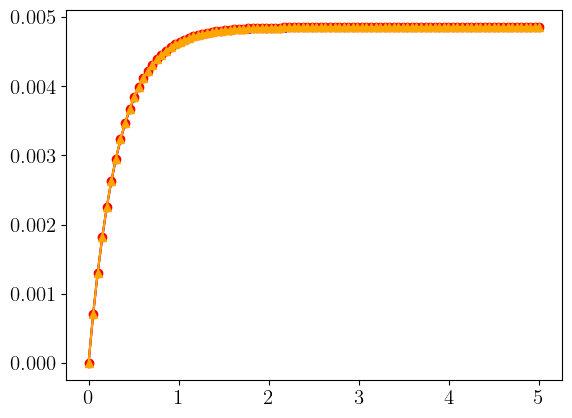

In [136]:
Z_o_exp_sfr_check = Z_o_exp_sfr(ts, m_o_cc, eta, r, tau_dep)

plt.plot(ts, Z_o_exp_sfr_check, color = 'blue', marker='*')
plt.plot(ts, numerical_y_t, color = 'red', marker = 'o')
plt.plot(times_test, M_O_df_test, color = 'orange', marker='^')
#plt.xlim(0,1)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [115]:
#Equilibrium values, let's compare

def Z_o_eq(m_o_cc, eta, r, tau_star, tau_sfh):
    return m_o_cc/(1 + eta - r - tau_star/tau_sfh)


Z_o_eq_exp_sfr = Z_o_eq(m_o_cc, eta, r, tau_star, tau_sfh=6)

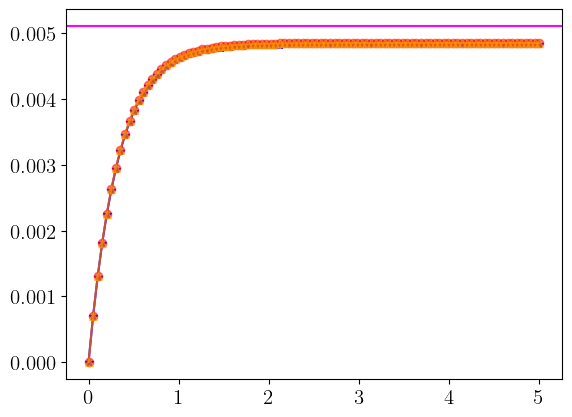

In [121]:
Z_o_exp_sfr_check = Z_o_exp_sfr(ts, m_o_cc, eta, r, tau_dep)

plt.plot(ts, Z_o_exp_sfr_check, color = 'blue', marker='*', alpha = 1)
plt.plot(ts, numerical_y_t, color = 'red', marker = 'o', alpha = 0.5)
plt.plot(M_O_df_test['t'], M_O_df_test['M_O'], color = 'orange', marker='^', alpha = 0.5)
plt.axhline(Z_o_eq_exp_sfr, color = 'magenta', label = 'equilibrium value')
#plt.xlim(0,1)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [109]:
"""def M_g_t(t):
    return t**2 - t

# Exponential SFR, numerical check
ts = np.linspace(0,5,100)
p_t = np.ones(100) * 1/tau_dep
f_t = M_g_t(ts) * m_o_cc/tau_star 

numerical_mu = mu_t(p_t, 0, ts[-1], n_bins=100)
numerical_y_t = y_t(numerical_mu, f_t, t_start=0, t_end=ts[-1])

plt.plot(ts, numerical_y_t, color = 'red')
plt.show()
"""

"def M_g_t(t):\n    return t**2 - t\n\n# Exponential SFR, numerical check\nts = np.linspace(0,5,100)\np_t = np.ones(100) * 1/tau_dep\nf_t = M_g_t(ts) * m_o_cc/tau_star \n\nnumerical_mu = mu_t(p_t, 0, ts[-1], n_bins=100)\nnumerical_y_t = y_t(numerical_mu, f_t, t_start=0, t_end=ts[-1])\n\nplt.plot(ts, numerical_y_t, color = 'red')\nplt.show()\n"